In [142]:
import indicoio, json, re
from urlextract import URLExtract
import numpy as np
import matplotlib.pyplot as plt
import datetime




In [152]:
#maxxed out these api keys:
#indicoio.config.api_key = 'dd2ccc617162179d9b29a3148b0377de'
#indicoio.config.api_key = 'd48be9a31ea9c241d883569acf6fd456'


#remaining api keys
indicoio.config.api_key = '797527d8dbe8cbb44e9a4019cd690afd'
#indicoio.config.api_key = 'a67ce4f377c965110a656e8587488294'
#indicoio.config.api_key = 'b52cc5abaeea7b5ce60bf776d667128c'









In [153]:
with open('parkland_ext.json', 'r') as myfile:
    data = json.loads(myfile.read())



In [154]:
count = 0
for x in data['comments']:
    count += 1

print("Number of comments in our dataset")
print(count)
    

Number of comments in our dataset
50500


In [155]:

    
extractor = URLExtract()

timestamp = []
body_text = []


num = 0
for x in data['comments']:
    num += 1
    
    # TEXT CLEANING
    input_str = data['comments'][x]['body'].lower() # all letters become lowercase   
    url = extractor.find_urls(input_str)          # extracts and removes url
    if(len(url) != 0):
        input_str = input_str.replace(url[0],'')

    input_str = re.sub(r'\d+', '', input_str)     # removes numbers
    input_str = input_str.strip()                 # removes whitespace
    input_str = input_str.replace('\n','')        # removes '/n'
    
    # parsing subreddits mentioned in the body text
    input_str = input_str.replace('_',' ')        # removes '_'
    input_str = input_str.replace('/',' ')        # removes '/'
    input_str = input_str.replace('*','')         # removes '*'
    input_str = input_str.replace('#',' ')        # removes '#'
    input_str = input_str.replace('.',' ')        # removes '.'


    input_str = re.sub(r'[^\w\s]','',input_str)   # removes leftover punctuation
    

    
    if( 'timestamp' in data['comments'][x] and input_str):
        body_text.append(input_str)
        timestamp.append(data['comments'][x]['timestamp'])

        
    data['comments'][x]['body'] = input_str




In [156]:
len(body_text)


50331

In [157]:
# Parsed the TIMESTAMP to create a list of DATATIME objects

from datetime import datetime


time = []

for x in timestamp:
    parsed_date = datetime.utcfromtimestamp(int(x))
    year = parsed_date.year
    month = parsed_date.month
    day = parsed_date.day
    hour = parsed_date.hour
    minute = parsed_date.minute
    customdate = datetime(year, month, day, hour, minute)
    time.append(customdate)
    
    


In [158]:
print(len(time))

50331


In [159]:
political1 = indicoio.political(body_text[0:10000])
political2 = indicoio.political(body_text[10000:20000])
political3 = indicoio.political(body_text[20000:30000])
political4 = indicoio.political(body_text[30000:40000])
political5 = indicoio.political(body_text[40000:50000])
political6 = indicoio.political(body_text[50000:50331])

                                
                                
political = political1 + political2 + political3 + political4 + political5 + political6

In [160]:
sentiment1 = indicoio.sentiment(body_text[0:10000])
sentiment2 = indicoio.sentiment(body_text[10000:20000])
sentiment3 = indicoio.sentiment(body_text[20000:30000])
sentiment4 = indicoio.sentiment(body_text[30000:40000])
sentiment5 = indicoio.sentiment(body_text[40000:50000])
sentiment6 = indicoio.sentiment(body_text[50000:50331])

                                
                                
sentiment = sentiment1 + sentiment2 + sentiment3 + sentiment4 + sentiment5 + sentiment6

In [161]:
len(sentiment)


50331

In [212]:
len(political)

libertarian = []
liberal = []
conservative = []
green = []


time_libertarian = []
time_liberal = []
time_conservative = []
time_green = []

sentiment_libertarian = []
sentiment_liberal = []
sentiment_conservative = []
sentiment_green = []




output = []
check = 0

num = 0


final_time = []
final_sentiment = []

for x in range(len(political)):
    for y in range(len(political[x])):
        
        if(political[x]['Libertarian'] > 0.50):
            libertarian.append(political[x]['Libertarian'])
            time_libertarian.append(time[x])
            sentiment_libertarian.append(sentiment[x])
            check = 1
        elif(political[x]['Liberal'] > 0.50):
            liberal.append(political[x]['Liberal'])
            time_liberal.append(time[x])
            sentiment_liberal.append(sentiment[x])
            check = 1
        elif(political[x]['Conservative'] > 0.50):
            conservative.append(political[x]['Conservative'])
            time_conservative.append(time[x])
            sentiment_conservative.append(sentiment[x])
            check = 1
        elif(political[x]['Green'] > 0.50):
            green.append(political[x]['Green'])
            time_green.append(time[x])
            sentiment_green.append(sentiment[x])
            check = 1
        
            
    
    if(check == 1):
        final_time.append(time[x])
        final_sentiment.append(sentiment[x])
        check = 0
    
        num = num + 1




print(len(conservative))
print(len(liberal))
print(len(libertarian))
print(len(green))





print(num)


15472
10752
66920
2512
23914


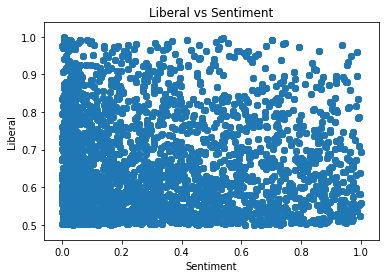

In [188]:
plt.scatter(sentiment_liberal, liberal)
plt.title('Liberal vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Liberal')
plt.show()




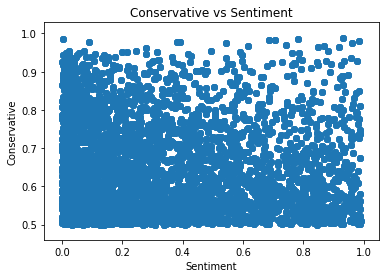

In [189]:
plt.scatter(sentiment_conservative, conservative)
plt.title('Conservative vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Conservative')
plt.show()


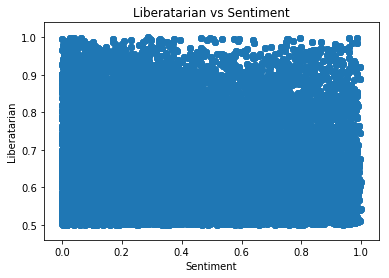

In [190]:
plt.scatter(sentiment_libertarian, libertarian)
plt.title('Liberatarian vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Liberatarian')
plt.show()


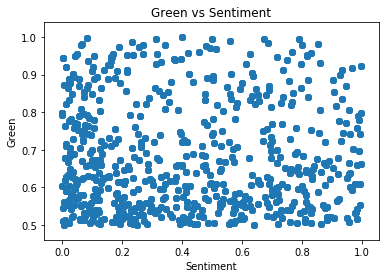

In [191]:
plt.scatter(sentiment_green, green)
plt.title('Green vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Green')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



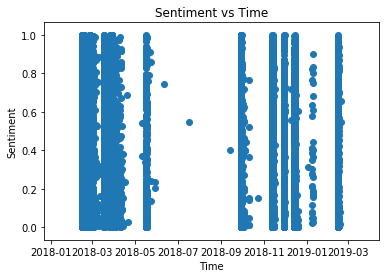

In [211]:
plt.scatter(time, sentiment)
plt.title('Sentiment vs Time')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.show()

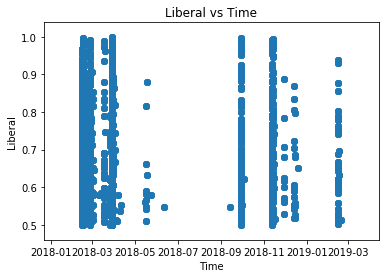

In [193]:
plt.scatter(time_liberal, liberal)
plt.title('Liberal vs Time')
plt.xlabel('Time')
plt.ylabel('Liberal')
plt.show()

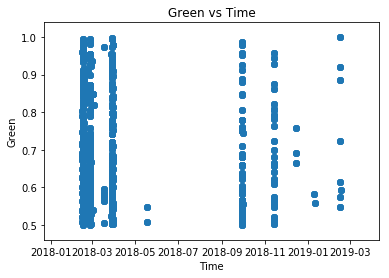

In [194]:
plt.scatter(time_green, green)
plt.title('Green vs Time')
plt.xlabel('Time')
plt.ylabel('Green')
plt.show()

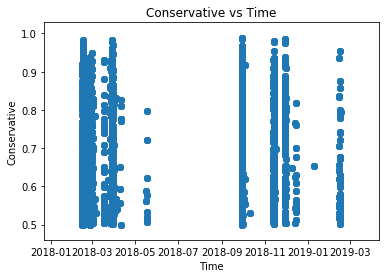

In [195]:
plt.scatter(time_conservative, conservative)
plt.title('Conservative vs Time')
plt.xlabel('Time')
plt.ylabel('Conservative')
plt.show()

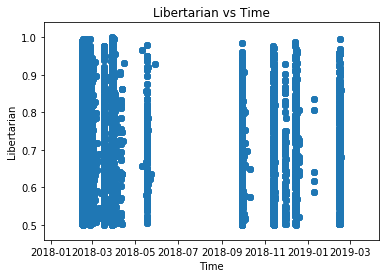

In [196]:
plt.scatter(time_libertarian, libertarian)
plt.title('Libertarian vs Time')
plt.xlabel('Time')
plt.ylabel('Libertarian')

plt.show()

In [80]:
x = {'Sentiment':sentiment,'Time':time}

import pandas as pd
df = pd.DataFrame(x)



In [198]:
import plotly.plotly as py
import plotly.graph_objs as go

import plotly 
plotly.tools.set_credentials_file(username='numank', api_key='E5NjgyAxT2azZXX97hnk')

In [208]:
# Sentiment VS Time

traceSentimentTime = go.Scatter(
    x = time,
    y = sentiment,
    mode = 'markers'
)

sentimentVStime = [traceSentimentTime]
py.iplot(sentimentVStime, filename='basic-scatter')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [207]:
# Conservative VS Time

traceConservativeTime = go.Scatter(
    x = time_conservative,
    y = conservative,
    mode = 'markers'
)

conservativeVStime = [traceConservativeTime]
py.iplot(conservativeVStime, filename='basic-scatter')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [206]:
# Green VS Time

traceGreenTime = go.Scatter(
    x = time_green,
    y = green,
    mode = 'markers'
)

greenVStime = [traceGreenTime]
py.iplot(greenVStime, filename='basic-scatter')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [205]:
# Liberal VS Time

traceLiberalTime = go.Scatter(
    x = time_liberal,
    y = liberal,
    mode = 'markers'
)

liberalVStime = [traceLiberalTime]
py.iplot(liberalVStime, filename='basic-scatter')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [204]:
# Libertarian VS Time

traceLibertarianTime = go.Scatter(
    x = time_libertarian,
    y = libertarian,
    mode = 'markers'
)

libertarianVSsentiment = [traceLibertarianTime]
py.iplot(libertarianVSsentiment, filename='basic-scatter')


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [199]:
# Liberatarian VS Sentiment

traceLibertarianTime = go.Scatter(
    x = sentiment_libertarian,
    y = libertarian,
    mode = 'markers'
)

libertarianVSsentiment = [traceLibertarianTime]

# Plot and embed in ipython notebook!
py.iplot(libertarianVSsentiment, filename='basic-scatter')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotly/plotly/plotly.py:248: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [203]:
# Conservative VS Sentiment

traceSentimentConservative = go.Scatter(
    x = sentiment_conservative,
    y = conservative,
    mode = 'markers'
)

conservativeVSsentiment = [traceSentimentConservative]

# Plot and embed in ipython notebook!
py.iplot(conservativeVSsentiment, filename='basic-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [201]:
# Liberal VS Sentiment

traceSentimentLiberal = go.Scatter(
    x = sentiment_liberal,
    y = liberal,
    mode = 'markers'
)

liberalVSsentiment = [traceSentimentLiberal]

# Plot and embed in ipython notebook!
py.iplot(liberalVSsentiment, filename='basic-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [202]:
# Green VS Sentiment

traceSentimentGreen = go.Scatter(
    x = sentiment_green,
    y = green,
    mode = 'markers'
)

greenVSsentiment = [traceSentimentGreen]

# Plot and embed in ipython notebook!
py.iplot(greenVSsentiment, filename='basic-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~numank/0 or inside your plot.ly account where it is named 'basic-scatter'


In [ ]:
libertarian = []
liberal = []
conservative = []
green = []


for x in final_political:
    libertarian.append(x['Libertarian'])
    liberal.append(x['Liberal'])
    conservative.append(x['Conservative'])
    green.append(x['Green'])